# 단변량 데이터 탐색
- 각 데이터를 따로 탐색해 보자

In [1]:
import pandas as pd
data = pd.read_csv('data/Ex_CEOSalary.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


## 설명
- 기업의 매출(sales)과 수익(roe)이 CEO의 연봉(salary)에 미치는 영향관계를 파악하려는 데이터
- sales, roe는 독립변수, salary는 종속변수

# 범주형 자료의 탐색
- `industry`는 categorical variable이며 산업 유형을 나타냄

In [3]:
# value_counts()를 통해서 해당 컬럼의 범주별 빈도를 파악해 보자
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
# 산업의 의미를 파악하기 쉽게 replace를 이용하여 의미를 부여해 보자
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

### 시각화 해보자
- `matplotlib`을 이용하면 시각화가 가능함
- jupyter에서 `%matplotlit inline` 명령을 입력하면 주피터에서 결과를 바로 확인할 수 있음

<AxesSubplot:ylabel='industry'>

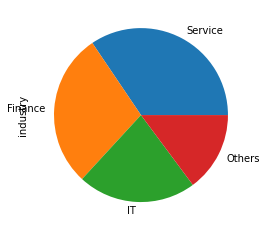

In [5]:
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")  # kind를 bar, line 등으로 변경하면 표의 모양이 바뀜

<AxesSubplot:>

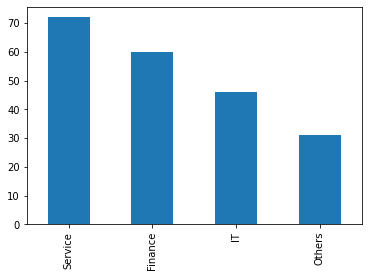

In [6]:
data['industry'].value_counts().plot(kind="bar")

# 연속형 자료의 탐색
- numeric/continuos variable은 `describe()`함수를 사용해서 기술통계량(descriptive statistics)를 확인할 수 있음
- 변수별 요약 통계량 확인이 가능하고 이를 통해 필요한 정보를 쉽게 얻을 수 있음

## 주목할만한 항목

### `mean(평균)`과 `50%,median(중위수)`의 차이
- 평균과 중위수가 일치할 수록 이상치가 적은 데이터를 의미함, 차이가 크면 이상치가 있다는 뜻

### `skewness(왜도)`[좌우대칭 확인용]
- skewness의 값은 0일 경우 정규분포와 일치하여 좌우가 대칭된 형태임을 알려주는 지표임
- skewness의 값이 양수일 경우 => 왼쪽에 자료가 더 많이 분포되어 있고, 오른쪽에 이상치들이 있다는 뜻
- skewness의 값이 음수일 경우 => 오른쪽에 자료가 더 많이 분포되어 있고, 왼쪽에 이상치들이 있다는 뜻
- skewness의 값이 2를 넘으면 한쪽으로 치우쳐져 있다는 의미로 해석 가능

### `kurtosis(첨도)`[중심쏠림 확인용]
- kurtosis의 값은 0일 경우 정규분포의 높이와 동일함
- kurtosis의 값이 클수록 중심에 자료가 많이 몰료있다는 의미

In [7]:
# describe() 함수로 기술통계량을 확인 해보자
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [8]:
# 평균과 중위수의 차이를 확인해 보자
# 데이터에 NaN이 들어있어서 경고가 나오는 것임, 나중에는 데이터 전처리를 더 빡세게 해서 이런 문제가 생기지 않도록 하자
data.mean() - data.median()

C:\Users\ghdsk\AppData\Local\Temp/ipykernel_23680/1577502703.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean() - data.median()
C:\Users\ghdsk\AppData\Local\Temp/ipykernel_23680/1577502703.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean() - data.median()


salary     242.119617
sales     3218.593331
roe          1.684211
dtype: float64

### 평균과 중위수 차이
- roe(수익) 컬럼은 평균과 중위수가 별로 차이나지 않음 => 이상적
- salary(연봉)과 sales(매출) 컬럼은 평균과 중위수의 차이가 많이 남 => 이상치가 있음을 예상할 수 있음, 고쳐야 함

In [9]:
# skewness(왜도)를 확인해 보자
# 데이터에 NaN이 들어있어서 경고가 나오는 것임, 나중에는 데이터 전처리를 더 빡세게 해서 이런 문제가 생기지 않도록 하자
data.skew()

C:\Users\ghdsk\AppData\Local\Temp/ipykernel_23680/214973551.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

### skewness(왜도) 확인
- roe(수익) 컬럼은 2를 넘지 않음 => 좌우가 어느정도 대칭임을 예상할 수 있음
- salary(연봉)과 sales(매출) 컬럼은 2보다 큰 값을 가짐 => 대부분의 데이터는 왼쪽에 몰려있고 오른쪽에 이상치 데이터가 있을 것으로 예상됨

In [10]:
# kurtosis(첨도)를 확인해 보자
# 데이터에 NaN이 들어있어서 경고가 나오는 것임, 나중에는 데이터 전처리를 더 빡세게 해서 이런 문제가 생기지 않도록 하자
data.kurtosis()

C:\Users\ghdsk\AppData\Local\Temp/ipykernel_23680/3614136873.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

### kurtosis(첨도) 확인
- roe(수익) 컬럼은 비교적 낮은 값을 가지기 때문에 정규분포 높이와 유사함을 예상할 수 있음
- salary(연봉)과 sales(매출) 컬럼은 큰 값을 가짐 => 대부분의 데이터가 중심에 몰려있음을 예상할 수 있음

### 자주 사용하는 기술통계량 함수들

| **함수**         | **설명**                       |
|----------------|:------------------------------|
| count          | NA 값을 제외한 값의 수를 반환           |
| describe       | 시리즈 혹은 데이터프레임의 각 열에 대한 기술 통계 |
| min, max       | 최소, 최대값                      |
| argmin, argmax | 최소, 최대값을 갖고 있는 색인 위치 반환      |
| idxmin, idxmax | 최소, 최대값을 갖고 있는 색인의 값 반환      |
| quantile       | 0부터 1까지의 분위수 계산              |
| sum            | 합                            |
| mean           | 평균                           |
| median         | 중위값                          |
| mad            | 평균값에서 절대 평균편차                |
| var            | 표본 분산                        |
| std            | 표본 정규분산                      |
| skew           | 표본 비대칭도                      |
| kurt           | 표본 첨도                        |
| cumsum         | 누적 합                         |
| cummin, cummax | 누적 최소값, 누적 최대값               |
| cumprod        | 누적 곱                         |
| diff           | 1차 산술차(시계열 데이터 사용시 유용)       |
| pct_change     | 퍼센트 변화율 계산                   |
| corr           | 데이터 프레임의 모든 변수 간 상관관계 계산하여 반환|
| cov            | 데이터 프레임의 모든 변수 간 공분산을 계산하여 반환|

## 연속형 자료의 형태를 파악하기 좋은 Histogram
- 히스토그램을 이용하면 정규성 여부, 이상치 존재 여부 등을 시각적으로 쉽게 파악 가능
- `데이터셋.hist()` 명령으로 쉽게 확인 가능(matplotlib의 pyplot 이용)
- `bins`는 구간너비, `figsize`는 토표의 크기 옵션

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

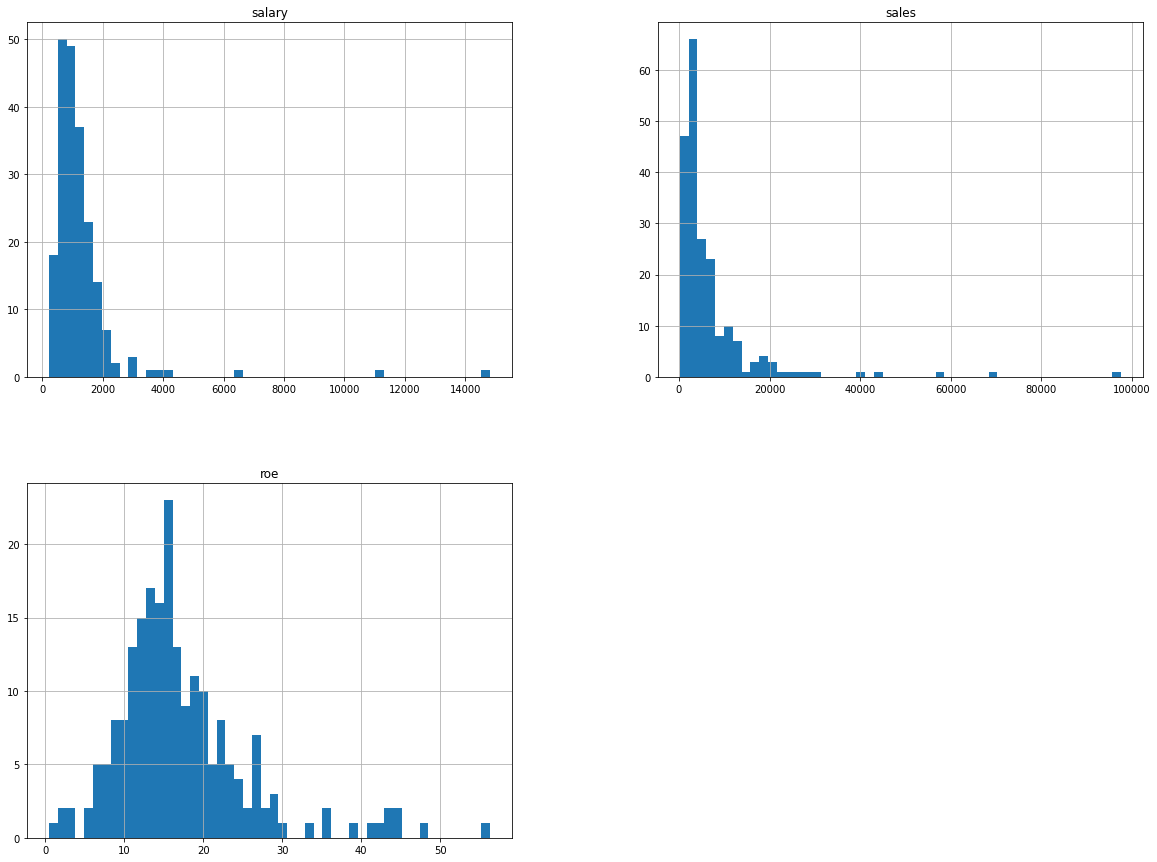

In [11]:
# 모든 데이터
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

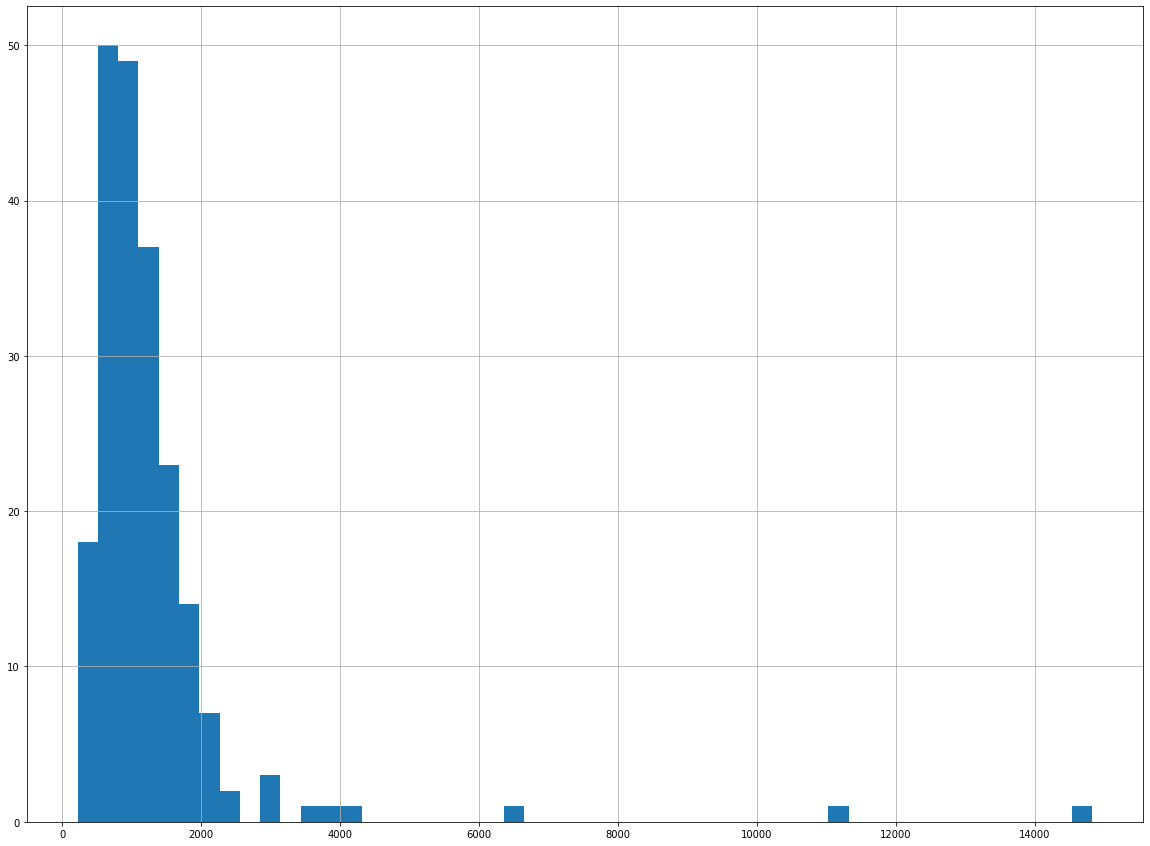

In [12]:
# salary만
data['salary'].hist(bins=50, figsize=(20,15))

### Salary는 오른쪽에 이상치가 존재하는 것 같다

<AxesSubplot:>

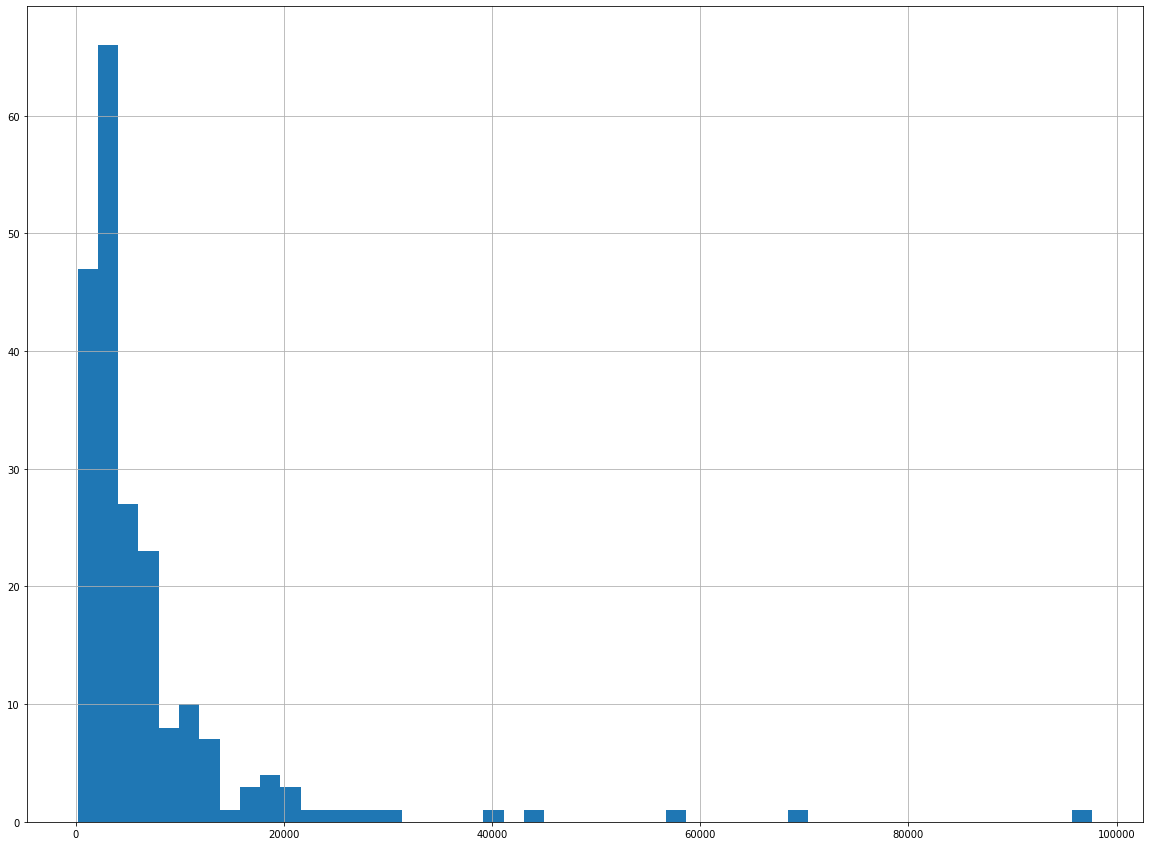

In [13]:
# sales만
data['sales'].hist(bins=50, figsize=(20,15))

## Sales는 오른쪽에 이상치가 존재하는 것 같다

<AxesSubplot:>

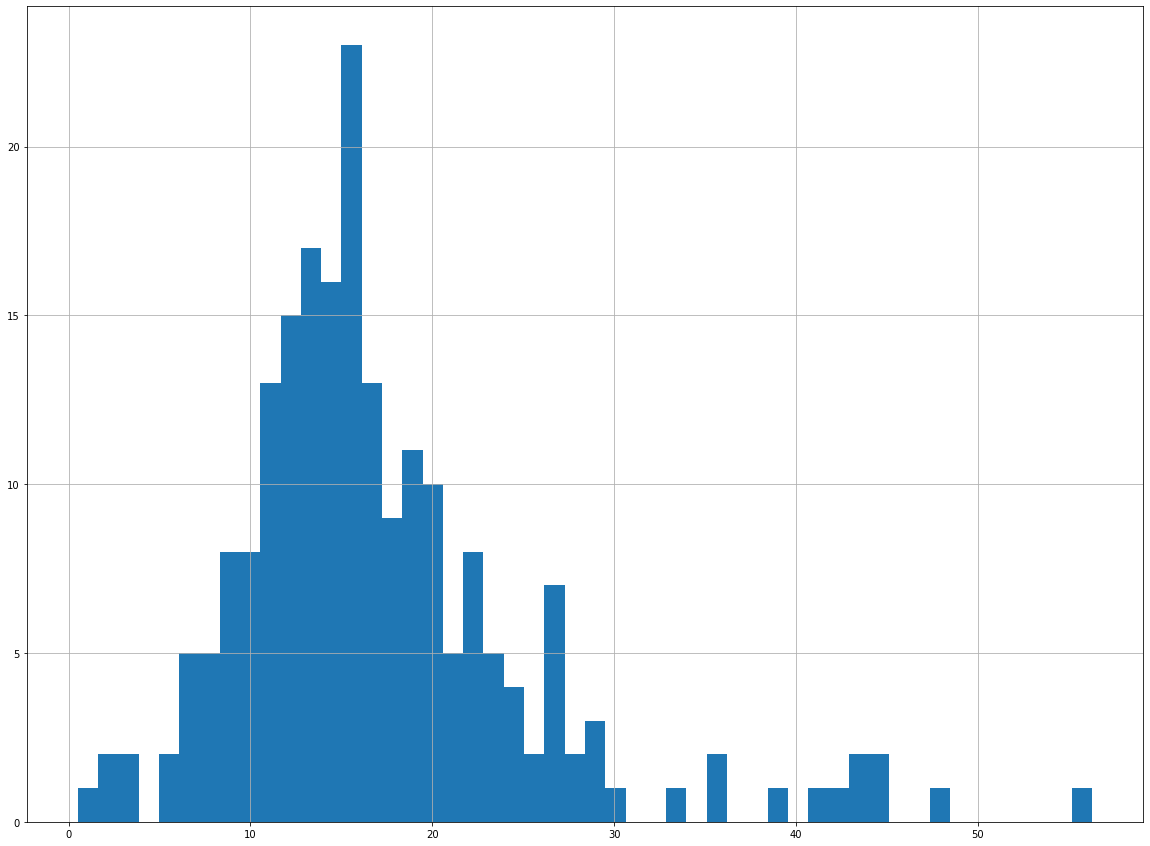

In [14]:
# roe
data['roe'].hist(bins=50, figsize=(20,15))

## Roe는 비교적 깔끔하다

---

# 이변량 데이터 탐색
- 두 변수 간의 탐색을 진행해 보자
- 회귀 문제인 지도학습의 경우, 선형성 여부를 판단할 수 있는 중요한 과정임
- `data.corr()` 명령으로 상관계수를 파악할 수 있음
    - 상관계수 수치는 -1~1 사이의 값을 가짐
    - 1에 가까울 수록 두 변수가 큰 관련이 있다고 볼 수 있음. 즉, 한 변수의 값이 증가하거나 감소함에 따라 다른 변수의 값도 일관성 있게 변화한다고 볼 수 있음
    - -1에 가까울 수록 두 변수는 큰 관련이 없다고 볼 수 있음
    

In [15]:
data.corr() # 기본적으로 corr(method='pearson') 이지만 spearman, kendall 방식으로 변경 가능

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


## 상관계수 파악 결과
- sales와 salary의 상관계수는 약 0.12로 매우 낮은 편이다
- roe와 salary의 상관계수는 약 0.11로 매우 낮은 편이다.
- 하지만 본 결과는 이상치 데이터가 존재하는 상태의 상관계수이다.
- 이상치를 수정하고 다시 결과를 파악해 보자...

## 산점도를 파악하는 scatter
- `matplotlic.pyplot`의 `scatter` 함수를 이용하여 두 변수의 산점도를 확인할 수 있음
- `plt.scatter(X, Y)` 형태로 사용

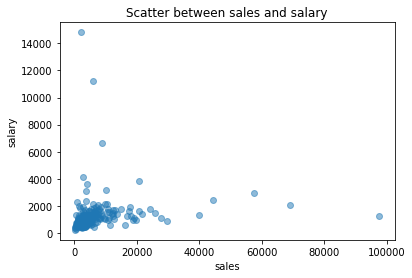

In [16]:
import matplotlib.pyplot as plt
plt.title("Scatter between sales and salary")
plt.xlabel("sales")
plt.ylabel("salary")
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

### Scatter between sales and salary 결과
- sales와 salary 모두 큰 이상치를 가지고 있어 왜곡이 발생한 것을 확인할 수 있음

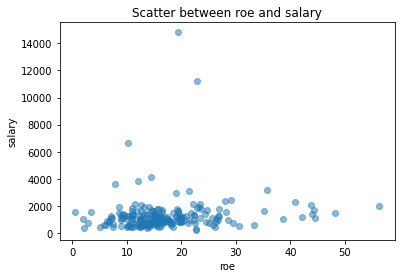

In [17]:
import matplotlib.pyplot as plt
plt.title("Scatter between roe and salary")
plt.xlabel("roe")
plt.ylabel("salary")
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()

### Scatter between roe and salary 결과
- roe는 나름 잘 퍼져 있는데 salary가 큰 이상치를 가지고 있어 왜곡이 발생한 것을 확인할 수 있음

## 산업 범주별로 salary의 기술통계를 파악해 보자

In [18]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

### 산업 범주별 salary 결과
- Finance의 평균 연봉이 가장 높다!
- Others의 평균 연봉이 가장 낮다...
- Finance의 mean과 50%가 좀 차이나는 것을 확인할 수 있다!

---

# Outlier(이상치) 처리하기
- Delete(제거): 일부 크거나 작은 값을 제거하여 정규성을 맞춤
- Transform(변환): 이상치를 제거하지 않고 이상치의 단위가 줄어들도록 log 변환 또는 제곱근 변환 등을 수행

## Box-whisker plot(상자수염도표)
- 이상치 파악을 시각적으로 보기 위해 사용하는 기법

### 그림 이해하는 법
1. 데이터에서 각 사분위 수 계산
    - Q1: 중앙값을 기준으로 하위 50% 중의 중간값, 전체 데이터 중 하위 25%에 해당하는 값
    - Q2: 전체 데이터의 중앙값
    - Q3: 중앙값을 기준으로 상위 50% 중의 중간값, 전체 데이터 중 상위 25%에 해당하는 값
2. 사분위 수 범위(Interquartile Range, IQR) 구하기
    - IQR = Q3 - Q1 # 쉽다!
3. 그림 그리기
    - Q1을 최저점으로, Q3을 최고점으로 가지는 직사각형을 그린다
    - Q2에 해당하는 위치에 가로선을 긋는다
    - Q3보다 큰 값 중 1.5 x IQR 값 이내에 있는 최대값에 가로선을 긋는다
    - Q1보다 작은 값 중 1.5 x IQR 값 이내에 있는 최소값에 가로선을 긋는다
    - 직사각형과 연결되는 선분을 그려준다(이걸 수염이라고 한다!)
4. 이상치 그리고 확인하기
    - 각 1.5 x IQR 보다 크거나 작은 값은 원으로 해당 위치를 나타내 준다.
    - 해당 원들이 이상치이다!!

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000002D8AE69BDF0>, <matplotlib.lines.Line2D object at 0x000002D8AE69B250>], 'caps': [<matplotlib.lines.Line2D object at 0x000002D8AE6B2A00>, <matplotlib.lines.Line2D object at 0x000002D8AE6B23A0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002D8AE666490>], 'medians': [<matplotlib.lines.Line2D object at 0x000002D8AE6B2C40>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002D8AE6B2430>], 'means': []})

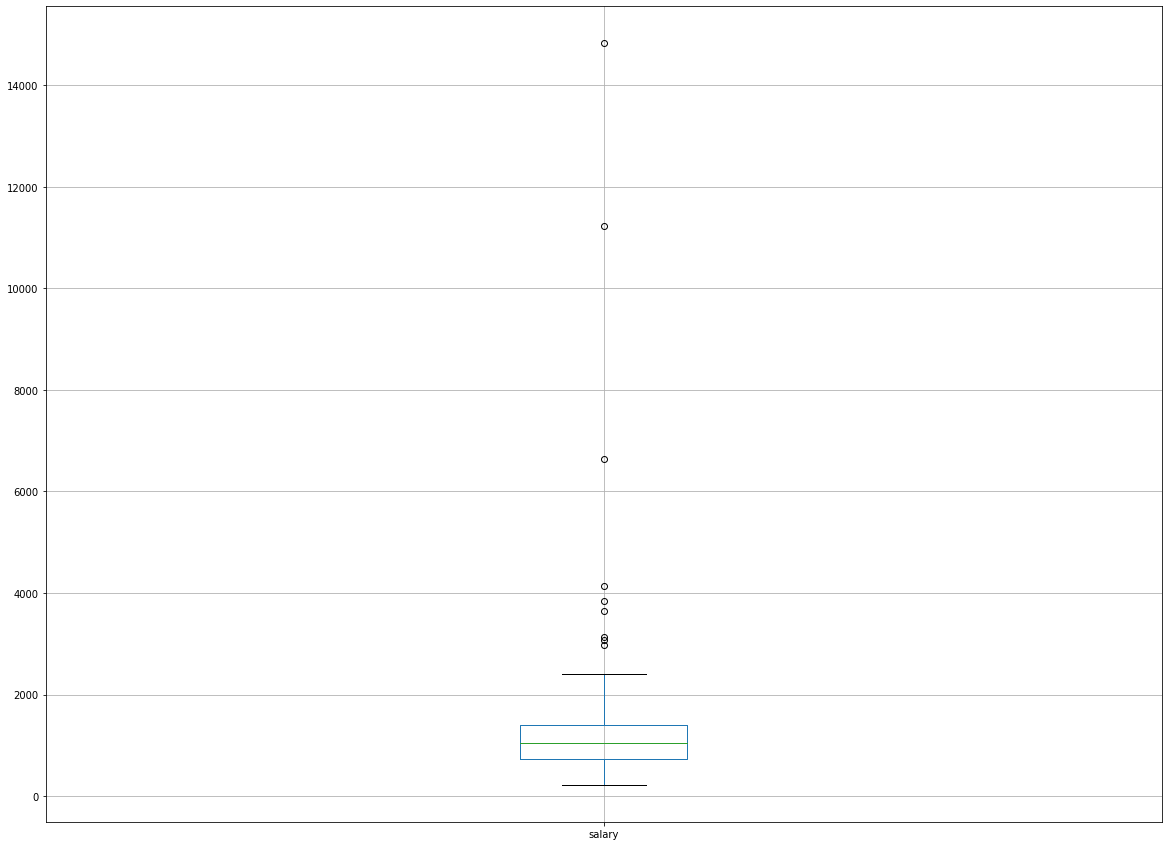

In [19]:
# salary의 boxplot
data.boxplot(column='salary', figsize=(20,15), return_type='both')

###  salary의 이상치 확인하기
- 지정한 최대값보다 큰 이상치 데이터가 다수 존재하는 것을 확인 가능!

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000002D8AE6C4250>, <matplotlib.lines.Line2D object at 0x000002D8AE6C4D00>], 'caps': [<matplotlib.lines.Line2D object at 0x000002D8AE67A070>, <matplotlib.lines.Line2D object at 0x000002D8AE67A400>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002D8AEFC6970>], 'medians': [<matplotlib.lines.Line2D object at 0x000002D8AE67A790>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002D8AE67AB20>], 'means': []})

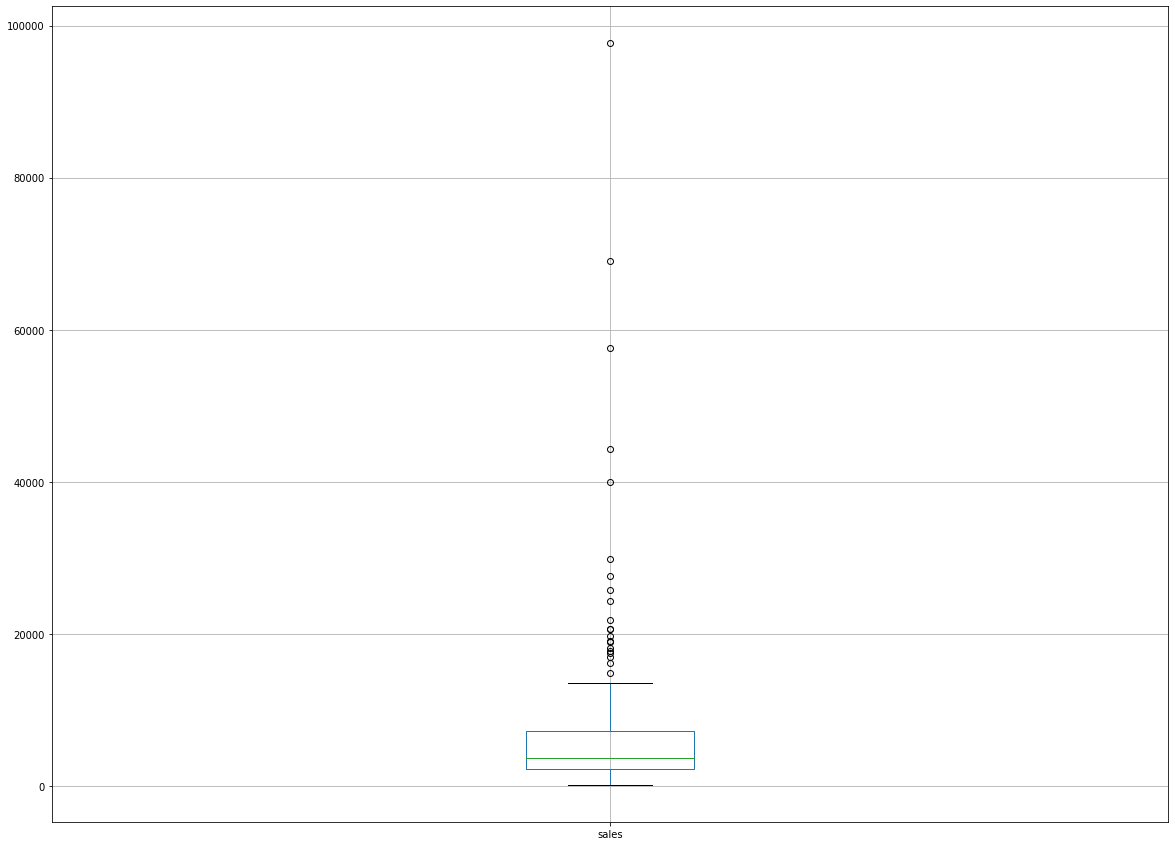

In [20]:
# sales의 boxplot
data.boxplot(column='sales', figsize=(20,15), return_type='both')

###  sales의 이상치 확인하기
- 지정한 최대값보다 큰 이상치 데이터가 다수 존재하는 것을 확인 가능!

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000002D8AEAE5FA0>, <matplotlib.lines.Line2D object at 0x000002D8AEAF5370>], 'caps': [<matplotlib.lines.Line2D object at 0x000002D8AEAF5700>, <matplotlib.lines.Line2D object at 0x000002D8AEAF5A90>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002D8AEAE5C10>], 'medians': [<matplotlib.lines.Line2D object at 0x000002D8AEAF5E20>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002D8AEB021F0>], 'means': []})

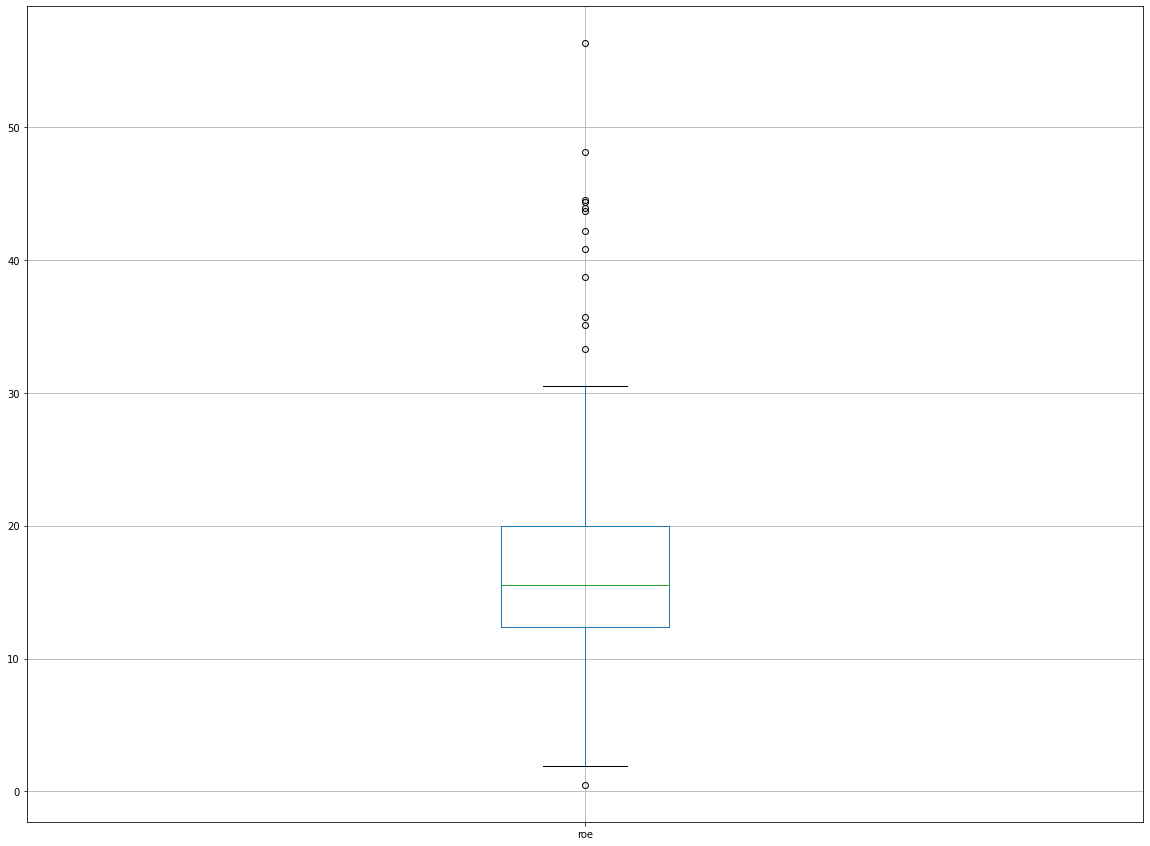

In [21]:
# roe의 boxplot
data.boxplot(column='roe', figsize=(20,15), return_type='both')

###  roe의 이상치 확인하기
- 위에 두 데이터보단 덜 하지만 지정한 최대값보다 큰 이상치 데이터가 어느정도 존재하는 것을 확인 가능!

---

## Salary 변수의 이상치 처리
- 위에서 얘기한 대로 IQR을 이용하여 최대, 최소 범위를 벗어난 데이터를 처리해 보자!

In [22]:
Q1_salary = data['salary'].quantile(q=0.25)  # 백분위로 생각하면 0.25가 아래다! 상위 0.25가 아니다!
Q3_salary = data['salary'].quantile(q=0.75)  # 백분위로 생각하면 0.75가 위다! 상위 0.75가 아니다!
IQR_salary = Q3_salary-Q1_salary
IQR_salary * 1.5  # 유효범위를 지정하기 위해 1.5를 곱해서 사용함

1006.5

### salary의 이상치를 제거해 보자!

<AxesSubplot:>

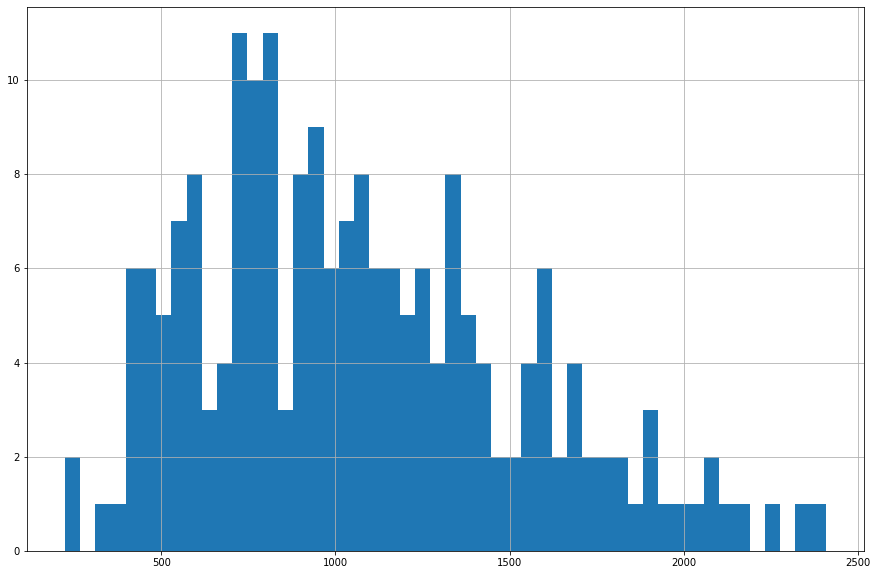

In [23]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5) & (data['salary']>Q1_salary-IQR_salary*1.5)]
data_IQR['salary'].hist(bins=50, figsize=(15,10))  # bins는 막대기 한개의 범위를 알려주는 것이다, 50단위로 하나씩 막대기가 생긴다!

## 나름 정규분포처럼 생겨졌다!!

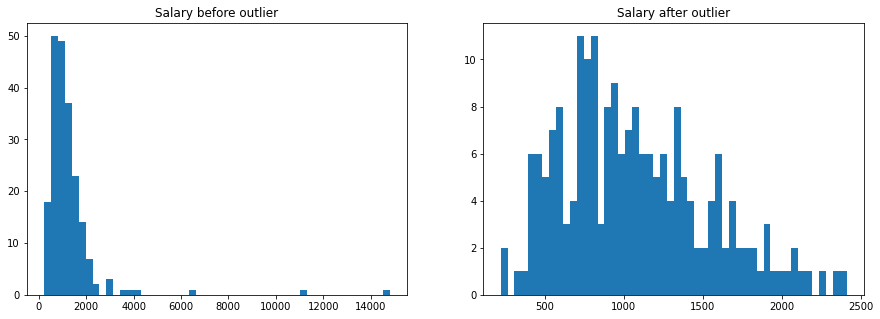

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Salary before outlier")
plt.hist(data['salary'], bins=50)

plt.subplot(122)
plt.title("Salary after outlier")
plt.hist(data_IQR['salary'], bins=50)
plt.show()

## Salary 이상치 처리 전 후 비교
- 확실히 깔끔해 졌다!!

---

## Sales 변수의 이상치 처리
- 위에서 얘기한 대로 IQR을 이용하여 최대, 최소 범위를 벗어난 데이터를 처리해 보자!

In [25]:
Q1_sales = data['sales'].quantile(q=0.25)  # 백분위로 생각하면 0.25가 아래다! 상위 0.25가 아니다!
Q3_sales = data['sales'].quantile(q=0.75)  # 백분위로 생각하면 0.75가 위다! 상위 0.75가 아니다!
IQR_sales = Q3_sales-Q1_sales
IQR_sales * 1.5  # 유효범위를 지정하기 위해 1.5를 곱해서 사용함

7450.049926757804

### sales의 이상치를 제거해 보자!

<AxesSubplot:>

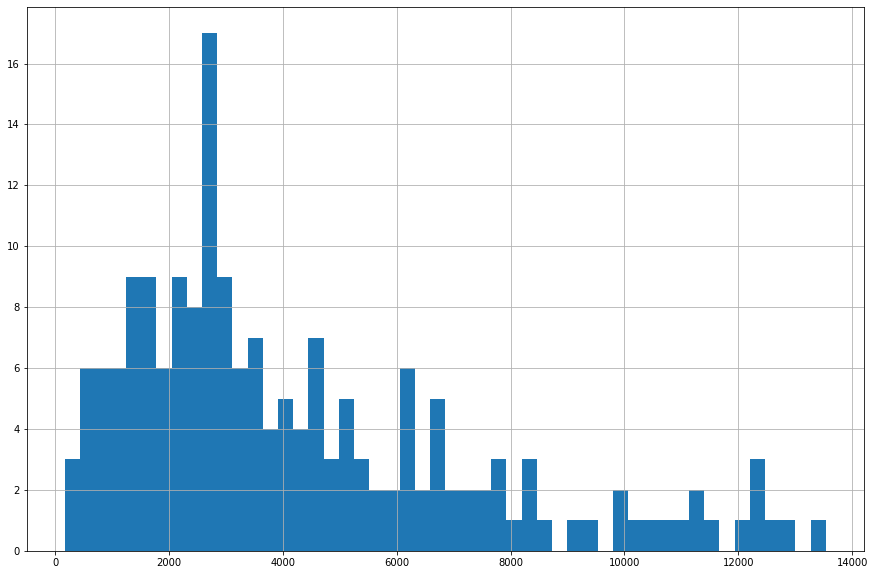

In [26]:
data_IQR = data[(data['salary']<Q3_salary+IQR_salary*1.5) & (data['salary']>Q1_salary-IQR_salary*1.5) & (data['sales']<Q3_sales+IQR_sales*1.5) & (data['sales']>Q1_sales-IQR_sales*1.5)]
data_IQR['sales'].hist(bins=50, figsize=(15,10))  # bins는 막대기 한개의 범위를 알려주는 것이다, 50단위로 하나씩 막대기가 생긴다!

## 나름 정규분포처럼 생겨졌다!!

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

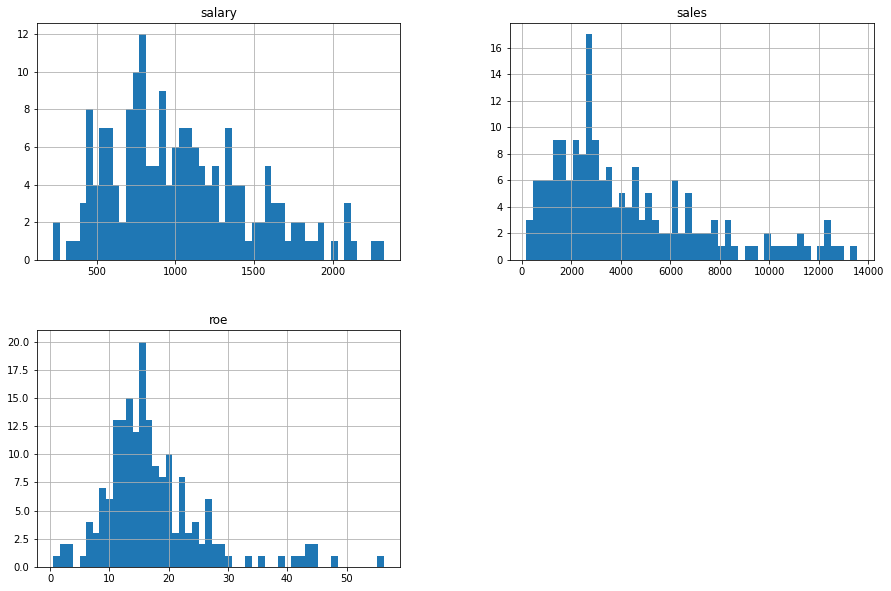

In [27]:
data_IQR.hist(bins=50, figsize=(15,10))

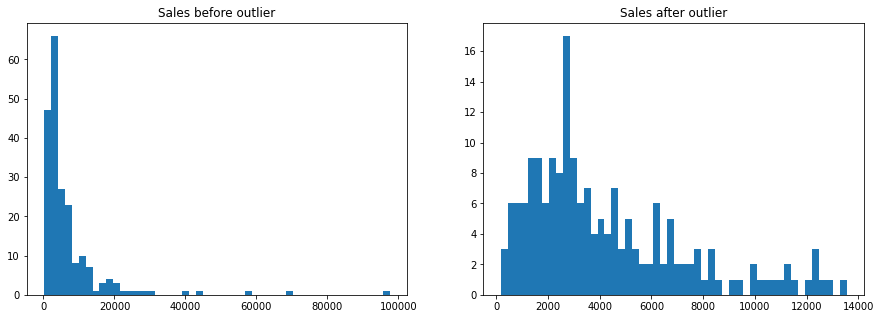

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Sales before outlier")
plt.hist(data['sales'], bins=50)

plt.subplot(122)
plt.title("Sales after outlier")
plt.hist(data_IQR['sales'], bins=50)
plt.show()

## Sales 이상치 처리 전 후 비교
- 확실히 깔끔해 졌다!!

## 이상치 제거 후 상관계수를 다시 확인해 보자

In [29]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [30]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


### 상관계수 변화 확인
- sales와 salary의 상관계수는 약 0.12 => 약 0.47로 많이 높아졌다!
- roe와 salary의 상관계수는 약 0.11 => 약 0.3으로 많이 높아졌다!

---

# 변수 변환
- 이상치를 제거하지 않고 데이터를 변환하여 이상치 문제를 해결해 보자
- 원 데이터에 log를 취하는 log 변환, 제곱근을 취하는 제곱근 변환이 일반적임
- 원리는 데이터의 단위를 줄여서 큰 값이 주는 영향을 줄이는 것임
- 하지만 데이터의 단위가 변하기 때문에 해석이 어려워질 수 있음

## Log 변환
- `np.log(df['변수명'])`으로 사용

In [31]:
import numpy as np

data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

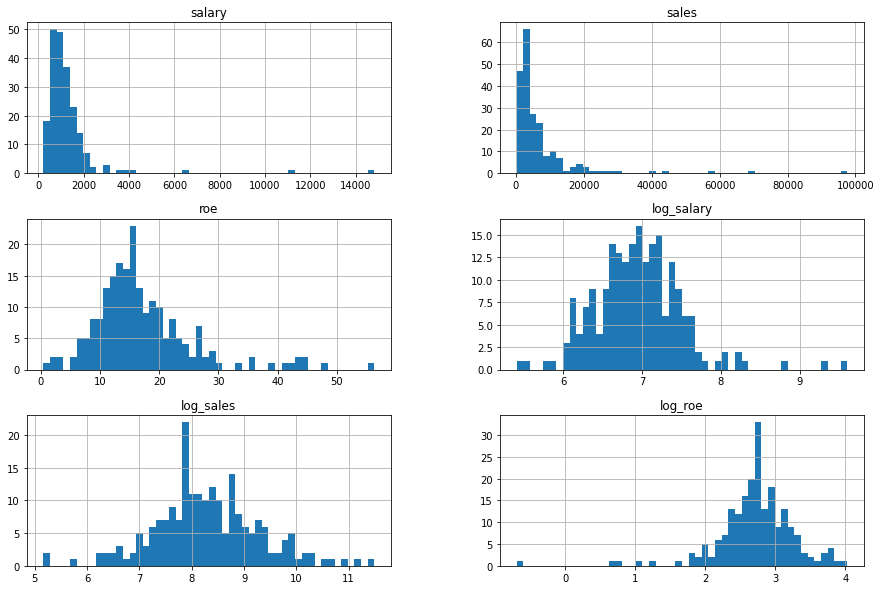

In [32]:
data.hist(bins=50, figsize=(15,10))

## 데이터를 제거하지 않았지만 효과가 있다
- log 변환을 통해 큰 데이터들의 영향력을 줄여 데이터를 중앙으로 모았다

## Log 변환 후 상관계수 확인

In [33]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


### 상관계수 변화 확인
- sales와 salary의 상관계수는 약 0.12 => 약 0.46로 많이 높아졌다!
- roe와 salary의 상관계수는 약 0.11 => 약 0.16으로 약간 높아졌다

## 제곱근 변환
- `np.sqrt(df['변수명'])`으로 사용

In [34]:
import numpy as np

data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

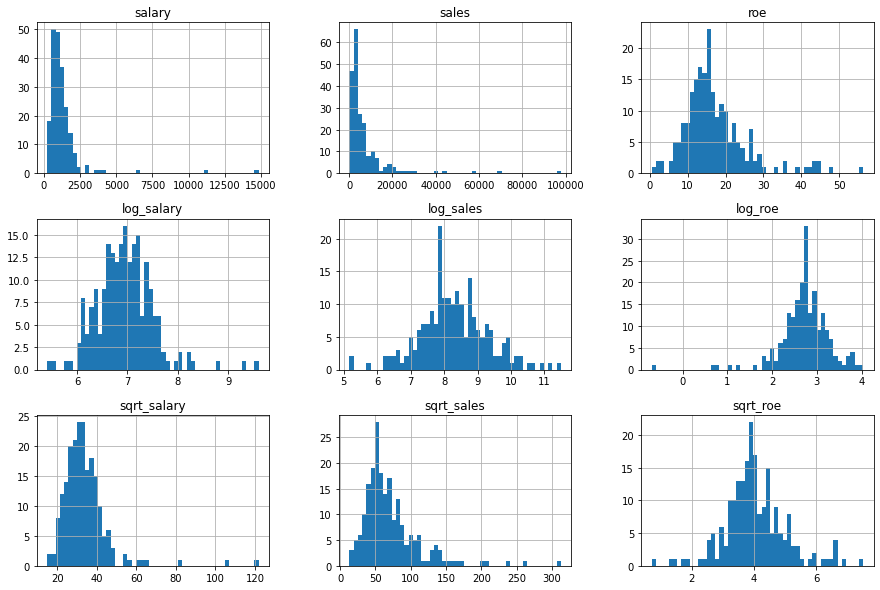

In [35]:
data.hist(bins=50, figsize=(15,10))

## 데이터를 제거하지 않았지만 효과가 있다
- log 변환을 통해 큰 데이터들의 영향력을 줄여 데이터를 중앙으로 모았다
- salary와 sales는 log 변환이 더 좋고 roe는 제곱근 변환이 더 좋은 것 같다

## Log 변환 후 상관계수 확인

In [36]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


### 상관계수 변화 확인
- sales와 salary의 상관계수는 약 0.12 => 약 0.29로 약간 높아졌다
- roe와 salary의 상관계수는 약 0.11 => 약 0.16으로 약간 높아졌다

---

# 결측치 처리
- 데이터에는 missing value(결측치)가 존재할 수 있음
- 이를 적절히 처리하지 않으면 오류가 발생하거나 분석에 문제가 발생할 수 있음
- DataFrame은 결측치를 `NaN`으로 표시함

In [37]:
import pandas as pd

data = pd.read_csv('data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


## 결측치 확인
- isnull(), notnull() 함수를 이용하면 결측 여부를 확인할 수 있음
- 자주사용되는 것은 아니나, 원리를 이해하면 나중에 조건식에 사용할 수 있음

In [38]:
pd.isnull(data)  # 결측치는 True, 아니면 False

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [39]:
data.isnull()  # 결측치는 True, 아니면 False

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [40]:
pd.notnull(data)  # 결측치는 False, 아니면 True

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [41]:
data.notnull()  # 결측치는 False, 아니면 True

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


### 컬럼별 결측값 개수 확인하기

In [42]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [43]:
data['salary'].isnull().sum()

2

In [44]:
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [45]:
data['salary'].notnull().sum()

8

In [46]:
data.isnull().sum(1)  # 행단위로 결측치 보기, 하나의 행에 몇개의 결측치가 있는지

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

### 결측치를 새로운 컬럼에 할당

In [47]:
data['missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


### 실측값을 새로운 컬럼에 할당

In [48]:
del data['missing']
data['valid'] = data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


---

## 결측값 제거
- `df.dropna(axis=0 or 1)` 명령으로 결측값을 제거할 수 있음
- `axis=0`: 결측 행을 제거(기본값)
- `axis=1`: 결측 열을 제거

In [49]:
# 1,2,4,5,9번 행이 제거된다
data_del_row = data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


In [50]:
# salary, sales, roe 컬럼이 제거된다
data_del_col = data.dropna(axis=1)
data_del_col

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


### 결측값이 있는 특정 행/열 제거
- `df[['변수명']].dropna()` 명령으로 제거 가능
- `df[['변수명', '변수명2', '변수명3']].dropna()`와 같이 여러 변수를 지정 가능, 사실 앞에는 데이터 프레임 쪼개는거고 쪼개진 데이터프레임에 dropna 한 것임
- `axis=1` 옵션으로 열 제거 가능

In [51]:
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [52]:
# 결측 행을 제거
data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [53]:
# 결측 열을 제거
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


---

## 결측값 대체
- 결측치가 많이 존재할 경우 이를 다 지워버리면 곤란함
- 결측치를 적절한 값으로 대체하는 방법이 존재
- `df.fillna()` 명령으로 결측치를 채워줄 수 있음
- 일반적으로 `특정값 대체`, `변수별 평균 대체`, `다른 변수값 대체`, `그룹 평균값 대체` 방식을 이용함

In [54]:
import pandas as pd
data = pd.read_csv('data/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


### 특정값 대체

In [55]:
# 결측치를 0으로 대체
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [56]:
# 결측치를 missing이라는 문자열로 대체
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [57]:
# 결측치를 해당 변수의 앞부분 값으로 대체
data_ffill = data.fillna(method='ffill')
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [58]:
# 결측치를 해당 변수의 뒷부분 값으로 대체
data_bfill = data.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


---

### 평균 대체

In [59]:
# 결측치를 각 변수의 평균 값으로 대체
data_mean = data.fillna(data.mean())
data_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [60]:
# 결측치를 각 변수의 중위값으로 대체
data_median = data.fillna(data.median())
data_median

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [61]:
# 결측치를 각 변수의 최대/최소값으로 대체
data_max = data.fillna(data.max())
data_max

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1368.0,9958.000000,10.900000,1
2,1368.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,27595.000000,13.800000,1
5,1145.0,27595.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,23.500000,2


In [62]:
# 다른 변수의 값으로 대체하고 싶을 경우
data_other_mean = data.fillna(data['salary'].mean())
data_other_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


In [63]:
data['salary'].mean()

1053.5

### 다른 변수값으로 대체
- `np.where(condition, T, F)` 명령을 통해 조건에 맞는 데이터를 T로, 맞지 않은 데이터를 F로 적용

In [64]:
# data2['sales']가 결측치가 아니면 data2['sales'] 값을, 결측치면 data2['salary'] 값으로 대체
import numpy as np
data2 = data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


### 집단 평균값으로 대체

In [65]:
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224976,13.64
2,1077.400000,3158.425049,15.80


In [66]:
# 평균을 적용하는 람다함수
fill_mean_func = lambda g: g.fillna(g.mean())

In [67]:
# 그룹정렬한 데이터에 apply로 fill_mean_func를 적용시키도록 하여, 각 산업의 평균이 들어가게 됨
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

In [68]:
# 산업별로 특정한 값을 지정할 수 있음

fill_values = {1: 1000, 2: 2000}

fill_func = lambda d: d.fillna(fill_values[d.name])

data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


In [69]:
# salary는 보간법, sales는 평균, roe는 missing 문자열로 대체
missing_fill_val = {
    'salary': data.salary.interpolate(),
    'sales': data.sales.mean(),
    'roe': 'missing'
}

missing_fill_val

{'salary': 0    1095.000000
 1     922.666667
 2     750.333333
 3     578.000000
 4    1368.000000
 5    1145.000000
 6    1078.000000
 7    1094.000000
 8    1237.000000
 9     833.000000
 Name: salary, dtype: float64,
 'sales': 9069.825012125,
 'roe': 'missing'}

In [70]:
data_multi = data.fillna(missing_fill_val)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


---